# Exploring Text Data

Consumer Complaint Database from Consumer Financial Protection Bureau

# Setup Dependencies

In [1]:
# dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 

import seaborn as sns

import missingno as msno

from sqlalchemy import (create_engine, MetaData)

# Load the data


In [2]:
DATA_PATH = '../data/consumer_complaints.csv'

In [3]:
df = pd.read_csv(DATA_PATH)

/Users/deniel.horvatic/repository/machine-learning-masterclass/project_16_call_center_nlp/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Just take a sample size of 1000
# df = df[:10000]

In [5]:
df.shape

(1256552, 18)

In [6]:
df.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [7]:
df.head(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,04/08/2019,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,NaN,NaN,CURO Intermediate Holdings,MO,NaN,NaN,NaN,Web,04/08/2019,Closed with explanation,Yes,NaN,3205347
1,04/08/2019,Debt collection,Medical debt,Attempts to collect debt not owed,Debt was paid,NaN,NaN,"Medical Data Systems, Inc.",PA,180XX,NaN,NaN,Web,04/08/2019,In progress,Yes,NaN,3204677
2,04/08/2019,Debt collection,Other debt,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,NaN,NaN,"Diversified Consultants, Inc.",MD,207XX,Servicemember,NaN,Web,04/08/2019,In progress,Yes,NaN,3205132
3,04/08/2019,"Payday loan, title loan, or personal loan",Personal line of credit,Getting a line of credit,NaN,NaN,Company believes it acted appropriately as aut...,"Harpeth Financial Services, LLC",VA,236XX,Servicemember,NaN,Web,04/08/2019,Closed with explanation,Yes,NaN,3204788
4,04/08/2019,Mortgage,Conventional home mortgage,Struggling to pay mortgage,NaN,NaN,NaN,"BAYVIEW LOAN SERVICING, LLC",WA,985XX,NaN,NaN,Web,04/08/2019,In progress,Yes,NaN,3205284


In [8]:
df.tail(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
1256547,12/01/2011,Credit card,NaN,Balance transfer,NaN,NaN,NaN,"CITIBANK, N.A.",TX,75228,NaN,NaN,Web,12/02/2011,Closed with relief,Yes,No,2099
1256548,12/01/2011,Mortgage,Home equity loan or line of credit,"Loan modification,collection,foreclosure",NaN,NaN,NaN,WELLS FARGO & COMPANY,NC,28210,NaN,NaN,Web,12/02/2011,Closed without relief,Yes,No,2136
1256549,12/01/2011,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",CO,80920,NaN,NaN,Web,12/01/2011,Closed with relief,Yes,No,2315
1256550,12/01/2011,Credit card,NaN,Rewards,NaN,NaN,NaN,BARCLAYS BANK DELAWARE,IL,600XX,NaN,NaN,Referral,12/01/2011,Closed with relief,Yes,No,2052
1256551,12/01/2011,Credit card,NaN,Rewards,NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",FL,33183,NaN,NaN,Referral,12/01/2011,Closed with relief,No,No,2203


---
# Clean Table Creation
## Clean table Header

In [9]:
df.columns.values

array(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response',
       'Company', 'State', 'ZIP code', 'Tags',
       'Consumer consent provided?', 'Submitted via',
       'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype=object)

In [10]:
header = {
    'Date received': 'date_received',
    'Product': 'product',
    'Sub-product':'sub_product',
    'Issue':'issue',
    'Sub-issue':'sub_issue',
    'Consumer complaint narrative':'consumer_complaint_narrative',
    'Company public response':'company_public_response',
    'Company':'company',
    'State':'state',
    'ZIP code':'zip_code',
    'Tags':'tags',
    'Consumer consent provided?':'is_consumer_consent_provided',
    'Submitted via':'submittted_via',
    'Date sent to company':'date_sent_to_company',
    'Company response to consumer':'company_response_to_consumer',
    'Timely response?':'timely_response',
    'Consumer disputed?':'consumer_disputed',
    'Complaint ID':'complaint_id',
}

In [11]:
clean_table = df

In [12]:
clean_table = clean_table.rename(columns = header)
clean_table.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,tags,is_consumer_consent_provided,submittted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id
0,04/08/2019,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,NaN,NaN,CURO Intermediate Holdings,MO,NaN,NaN,NaN,Web,04/08/2019,Closed with explanation,Yes,NaN,3205347
1,04/08/2019,Debt collection,Medical debt,Attempts to collect debt not owed,Debt was paid,NaN,NaN,"Medical Data Systems, Inc.",PA,180XX,NaN,NaN,Web,04/08/2019,In progress,Yes,NaN,3204677
2,04/08/2019,Debt collection,Other debt,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,NaN,NaN,"Diversified Consultants, Inc.",MD,207XX,Servicemember,NaN,Web,04/08/2019,In progress,Yes,NaN,3205132
3,04/08/2019,"Payday loan, title loan, or personal loan",Personal line of credit,Getting a line of credit,NaN,NaN,Company believes it acted appropriately as aut...,"Harpeth Financial Services, LLC",VA,236XX,Servicemember,NaN,Web,04/08/2019,Closed with explanation,Yes,NaN,3204788
4,04/08/2019,Mortgage,Conventional home mortgage,Struggling to pay mortgage,NaN,NaN,NaN,"BAYVIEW LOAN SERVICING, LLC",WA,985XX,NaN,NaN,Web,04/08/2019,In progress,Yes,NaN,3205284


---
# Enrich table with features
We need a column with coversions with zero or one as values. 

In [13]:
clean_table['coversion'] = np.random.randint(0, 2, clean_table.shape[0])
clean_table['coversion'].head()

0    0
1    1
2    1
3    0
4    1
Name: coversion, dtype: int64

We need a column with agent ids

In [14]:
clean_table['agent_id'] = np.random.randint(0, 10, clean_table.shape[0])
clean_table['agent_id'].head()

0    8
1    3
2    9
3    7
4    6
Name: agent_id, dtype: int64

# Standard Analysis - Numerical Values

In [15]:
# Not useful because we have no numeric values except the complaint_id
clean_table.describe()

,complaint_id,coversion,agent_id
count,1.256552e+06,1.256552e+06,1.256552e+06
mean,1.903487e+06,5.000724e-01,4.498914e+00
std,9.565312e+05,5.000002e-01,2.872048e+00
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.100795e+06,0.000000e+00,2.000000e+00
50%,2.085759e+06,1.000000e+00,4.000000e+00
75%,2.773118e+06,1.000000e+00,7.000000e+00
max,3.205347e+06,1.000000e+00,9.000000e+00


In [16]:
# df.hist(xrot=-45, figsize=(14,14))
# plt.show()

# Standard Analysis - Categorical Values

In [17]:
# display summary statistics for categorial features
clean_table.describe(include=['object'])

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,tags,is_consumer_consent_provided,submittted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed
count,1256552,1256552,1021386,1256552,728921,378495,436013,1256552,1238231,1145126,171984,676192,1256552,1256552,1256546,1256552,768505
unique,2685,18,76,167,218,362115,10,5253,63,22459,3,4,6,2634,8,2,2
top,09/08/2017,Mortgage,Credit reporting,Incorrect information on your report,Information belongs to someone else,There are many mistakes appear in my report wi...,Company has responded to the consumer and the ...,"EQUIFAX, INC.",CA,300XX,Servicemember,Consent provided,Web,09/08/2017,Closed with explanation,Yes,No
freq,3553,275730,209739,126598,54500,953,300431,112203,172954,7091,82450,378812,924431,3387,973634,1224838,620127


date_received


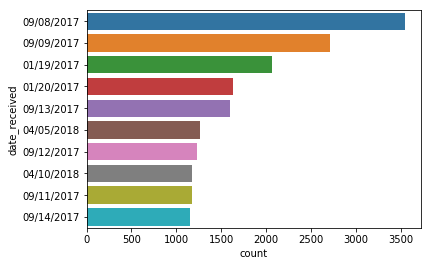

product


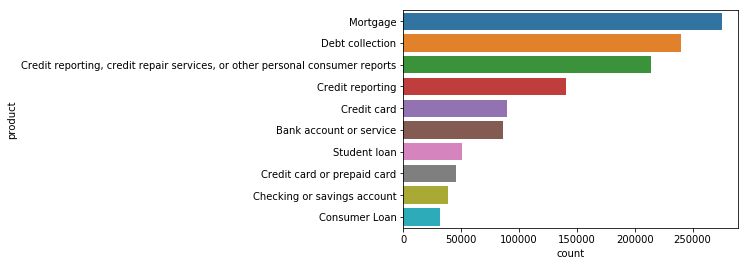

sub_product


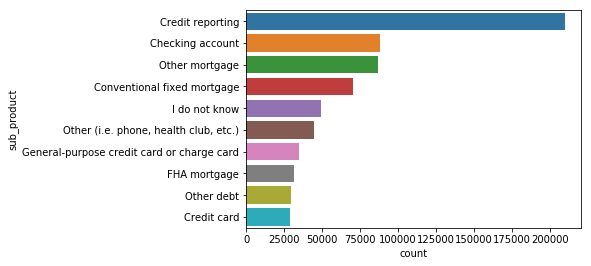

issue


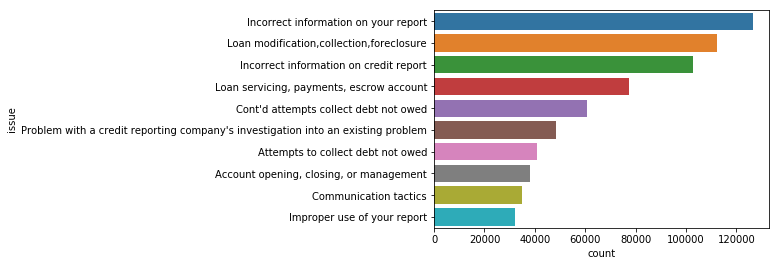

sub_issue


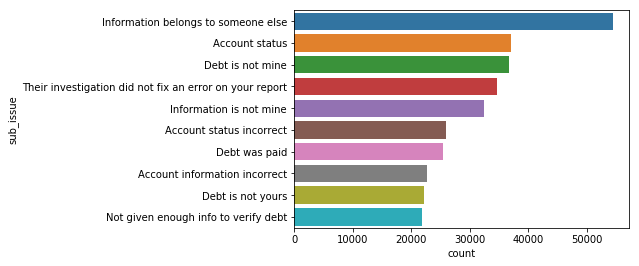

consumer_complaint_narrative


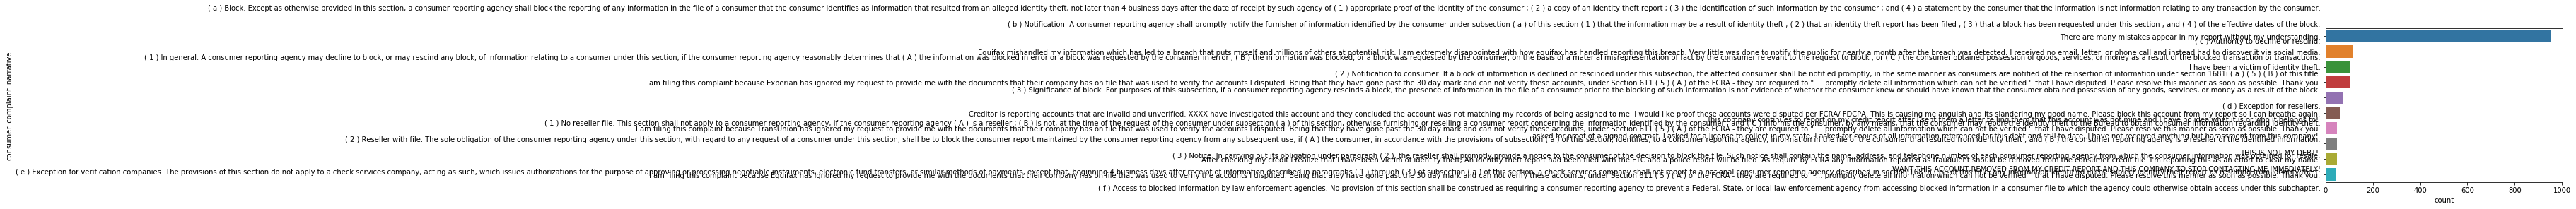

company_public_response


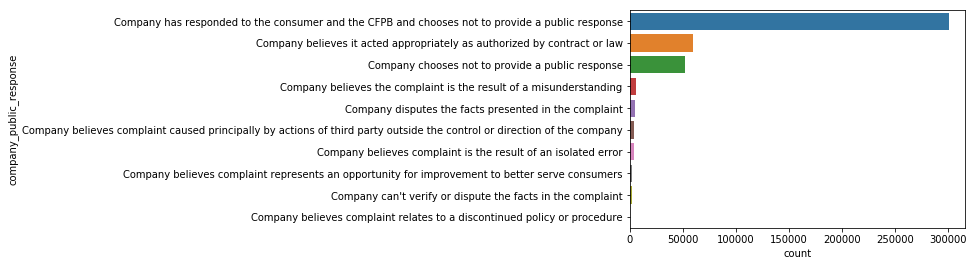

company


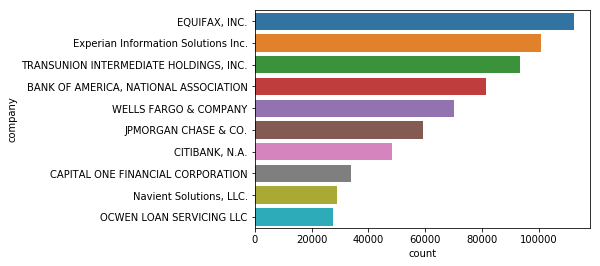

state


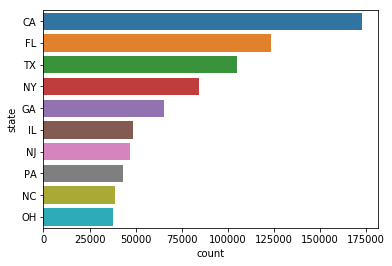

zip_code


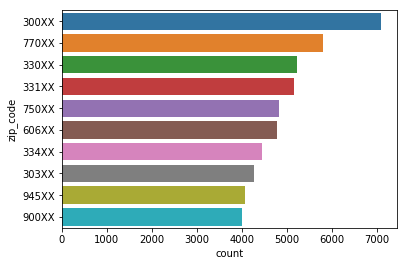

tags


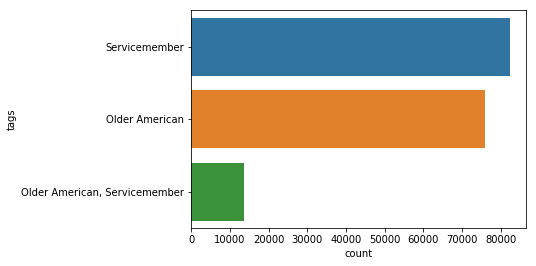

is_consumer_consent_provided


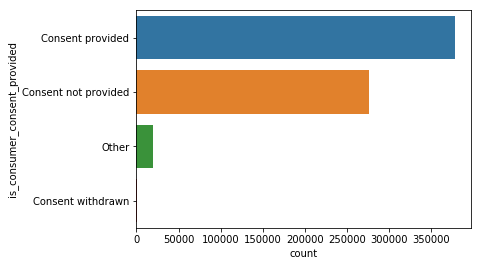

submittted_via


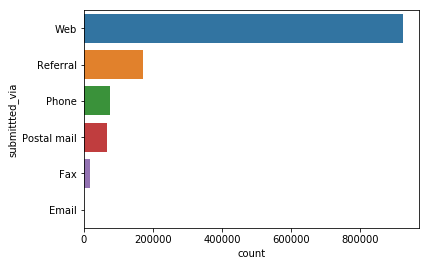

date_sent_to_company


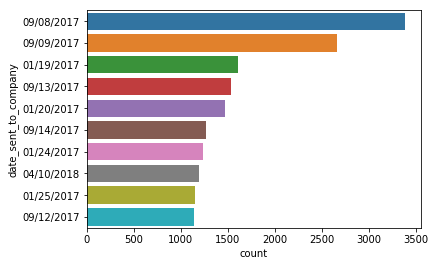

company_response_to_consumer


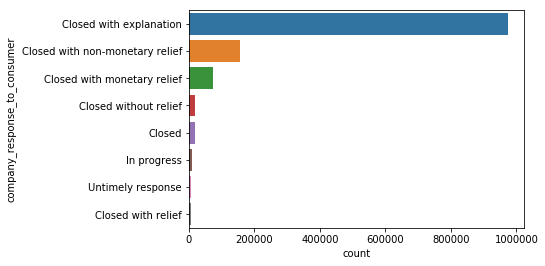

timely_response


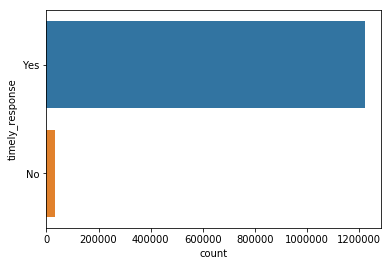

consumer_disputed


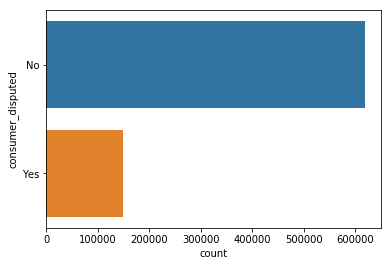

In [18]:
for feature in clean_table.dtypes[clean_table.dtypes == 'object'].index:
    print(feature)
    sns.countplot(y=feature, data=clean_table, 
                  order=clean_table[feature].value_counts().iloc[:10].index)
    plt.show()

# Standard Analysis - Check for segmentations
## Conversions by agent   

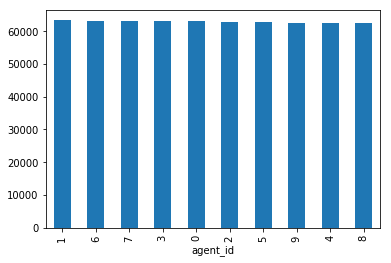

In [54]:
group_by_agent = clean_table.groupby(['agent_id']).sum()
group_by_agent = group_by_agent.sort_values('coversion',ascending=False)
group_by_agent['coversion']
group_by_agent['coversion'].plot.bar()

## Conversions by product

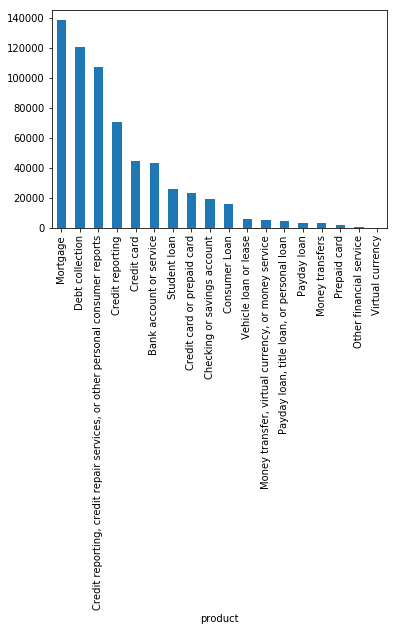

In [57]:
group_by_product = clean_table.groupby(['product']).sum()
group_by_product = group_by_product.sort_values('coversion',ascending=False)
group_by_product['coversion']
group_by_product['coversion'].plot.bar()

# Standard Analysis - Check for correlations (HEATMAP)

In [20]:
correlations = clean_table.corr()

In [21]:
# create a mask with 23,23 dimensionality and trim them from the middle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

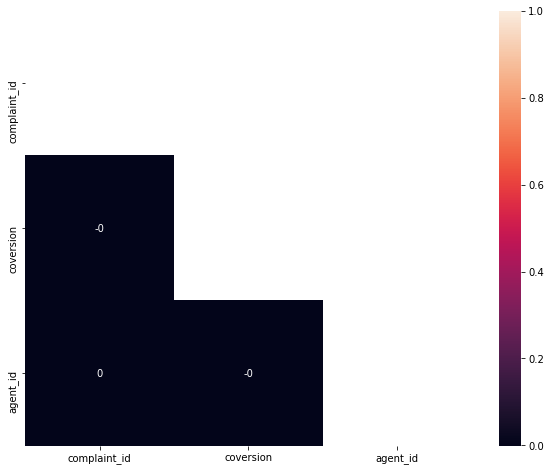

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, fmt='.0f', mask=mask)

---
# Save Clean Table

In [23]:
clean_table.to_csv('../data/clean_table.csv', index=False)
clean_table.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,tags,is_consumer_consent_provided,submittted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id,coversion,agent_id
0,04/08/2019,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,NaN,NaN,CURO Intermediate Holdings,MO,NaN,NaN,NaN,Web,04/08/2019,Closed with explanation,Yes,NaN,3205347,0,8
1,04/08/2019,Debt collection,Medical debt,Attempts to collect debt not owed,Debt was paid,NaN,NaN,"Medical Data Systems, Inc.",PA,180XX,NaN,NaN,Web,04/08/2019,In progress,Yes,NaN,3204677,1,3
2,04/08/2019,Debt collection,Other debt,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,NaN,NaN,"Diversified Consultants, Inc.",MD,207XX,Servicemember,NaN,Web,04/08/2019,In progress,Yes,NaN,3205132,1,9
3,04/08/2019,"Payday loan, title loan, or personal loan",Personal line of credit,Getting a line of credit,NaN,NaN,Company believes it acted appropriately as aut...,"Harpeth Financial Services, LLC",VA,236XX,Servicemember,NaN,Web,04/08/2019,Closed with explanation,Yes,NaN,3204788,0,7
4,04/08/2019,Mortgage,Conventional home mortgage,Struggling to pay mortgage,NaN,NaN,NaN,"BAYVIEW LOAN SERVICING, LLC",WA,985XX,NaN,NaN,Web,04/08/2019,In progress,Yes,NaN,3205284,1,6


# Transform to Excel

In [24]:
# clean_table.to_excel("../data/customer_complaints.xlsx")

---
# Data Cleaning

## Handle missing values

In [25]:
def display_missing_values():
    print( (clean_table.isnull().sum() * 1000 // len(clean_table))/10 )

display_missing_values()

date_received                    0.0
product                          0.0
sub_product                     18.7
issue                            0.0
sub_issue                       41.9
consumer_complaint_narrative    69.8
company_public_response         65.3
company                          0.0
state                            1.4
zip_code                         8.8
tags                            86.3
is_consumer_consent_provided    46.1
submittted_via                   0.0
date_sent_to_company             0.0
company_response_to_consumer     0.0
timely_response                  0.0
consumer_disputed               38.8
complaint_id                     0.0
coversion                        0.0
agent_id                         0.0
dtype: float64


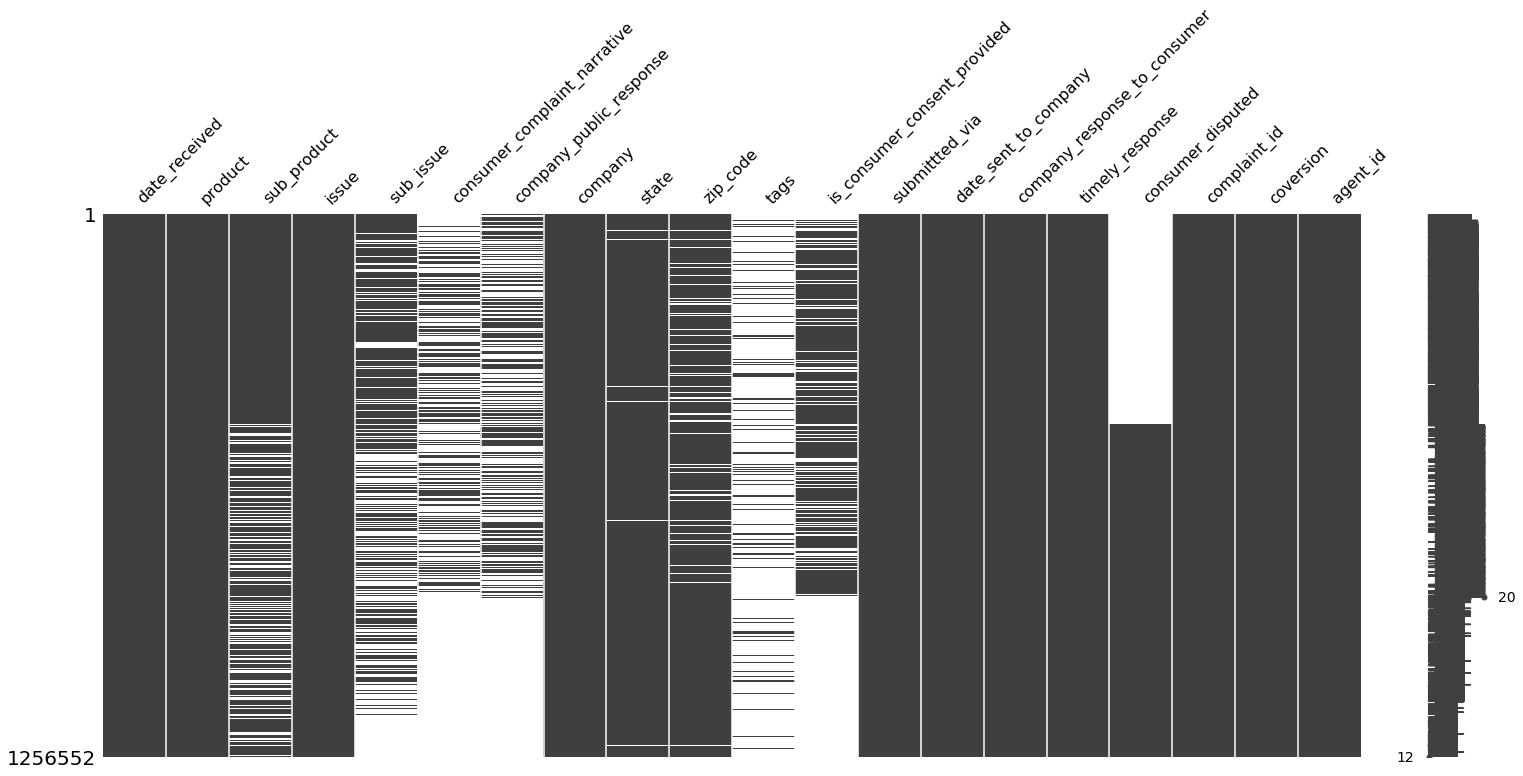

In [26]:
msno.matrix(clean_table)

# Conclusion
A lot of missing data.   
Missing Tags 86% - evaluation if this is really a relevant feature.  

Further exploration necessary

# Removing Tags

In [27]:
clean_table = clean_table.drop(['tags'], axis=1)
display_missing_values()

date_received                    0.0
product                          0.0
sub_product                     18.7
issue                            0.0
sub_issue                       41.9
consumer_complaint_narrative    69.8
company_public_response         65.3
company                          0.0
state                            1.4
zip_code                         8.8
is_consumer_consent_provided    46.1
submittted_via                   0.0
date_sent_to_company             0.0
company_response_to_consumer     0.0
timely_response                  0.0
consumer_disputed               38.8
complaint_id                     0.0
coversion                        0.0
agent_id                         0.0
dtype: float64


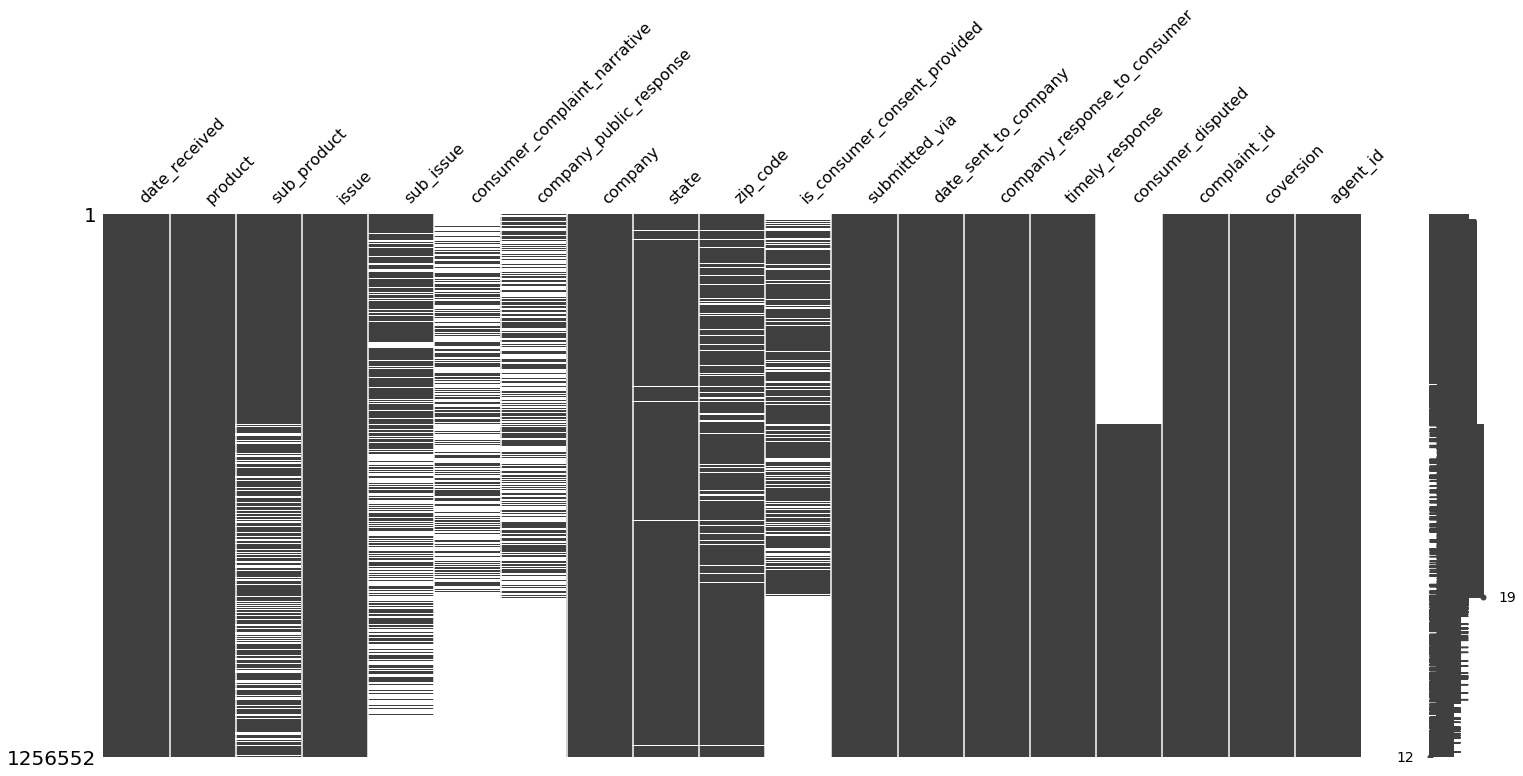

In [28]:
msno.matrix(clean_table)

# Fill missing values

In [31]:
for column in clean_table.select_dtypes(include=['object']):
    clean_table[column] = clean_table[column].fillna('Missing')

display_missing_values()

date_received                   0.0
product                         0.0
sub_product                     0.0
issue                           0.0
sub_issue                       0.0
consumer_complaint_narrative    0.0
company_public_response         0.0
company                         0.0
state                           0.0
zip_code                        0.0
is_consumer_consent_provided    0.0
submittted_via                  0.0
date_sent_to_company            0.0
company_response_to_consumer    0.0
timely_response                 0.0
consumer_disputed               0.0
complaint_id                    0.0
coversion                       0.0
agent_id                        0.0
dtype: float64


# Remove Outlier

In [ ]:
# TODO

# Fix Structural Errors

In [32]:
# TODO

---
# Feature Engineering

In [37]:
clean_table.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,is_consumer_consent_provided,submittted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id,coversion,agent_id
0,04/08/2019,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,Missing,Missing,CURO Intermediate Holdings,MO,Missing,Missing,Web,04/08/2019,Closed with explanation,Yes,Missing,3205347,0,8
1,04/08/2019,Debt collection,Medical debt,Attempts to collect debt not owed,Debt was paid,Missing,Missing,"Medical Data Systems, Inc.",PA,180XX,Missing,Web,04/08/2019,In progress,Yes,Missing,3204677,1,3
2,04/08/2019,Debt collection,Other debt,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,Missing,Missing,"Diversified Consultants, Inc.",MD,207XX,Missing,Web,04/08/2019,In progress,Yes,Missing,3205132,1,9
3,04/08/2019,"Payday loan, title loan, or personal loan",Personal line of credit,Getting a line of credit,Missing,Missing,Company believes it acted appropriately as aut...,"Harpeth Financial Services, LLC",VA,236XX,Missing,Web,04/08/2019,Closed with explanation,Yes,Missing,3204788,0,7
4,04/08/2019,Mortgage,Conventional home mortgage,Struggling to pay mortgage,Missing,Missing,Missing,"BAYVIEW LOAN SERVICING, LLC",WA,985XX,Missing,Web,04/08/2019,In progress,Yes,Missing,3205284,1,6


## Create new feature for the length of the review.   

## Create new feature for the word count of the review.

---
# Text Classification

## Sentiment analysis of narrative

## Print the top 15 words said by each agent

## Count bad words per call
like issue and so on

## Maybe some scatter plot for 

# Finished Model

In [35]:
# Dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 

import seaborn as sns
import missingno as msno

from sqlalchemy import (create_engine, MetaData)


class CustomerAgentConversionModel():
    def __init__(self):
        self.DATA_PATH = '../data/consumer_complaints.csv'
        self.header = {
            'Date received': 'date_received',
            'Product': 'product',
            'Sub-product':'sub_product',
            'Issue':'issue',
            'Sub-issue':'sub_issue',
            'Consumer complaint narrative':'consumer_complaint_narrative',
            'Company public response':'company_public_response',
            'Company':'company',
            'State':'state',
            'ZIP code':'zip_code',
            'Tags':'tags',
            'Consumer consent provided?':'is_consumer_consent_provided',
            'Submitted via':'submittted_via',
            'Date sent to company':'date_sent_to_company',
            'Company response to consumer':'company_response_to_consumer',
            'Timely response?':'timely_response',
            'Consumer disputed?':'consumer_disputed',
            'Complaint ID':'complaint_id',
        }
        # other properties would be the database connection, ...
    
    def load_csv(self):
        return pd.read_csv(DATA_PATH)
    
    def clean_data(self, data): 
        data = self.map_header(data)
        data = self.remove_cols_with_too_much_missing_values(data)
        data = self.fill_missing_values(data)  
        return data
    
    def save_csv(self, data, path='../data/clean_table.csv'):
        data.to_csv(path, index=False)
        
    ### internal methods
        
    def map_header(self,data):
        data = data.rename(columns = self.header)
        return data
    
    def remove_cols_with_too_much_missing_values(self, data):
        return data.drop(['tags'], axis=1)
        
    def fill_missing_values(self,data):
        for column in data.select_dtypes(include=['object']):
            data[column] = data[column].fillna('Missing')
        return data

    

In [36]:
# Let's try it out
model = CustomerAgentConversionModel()

data = model.load_csv()
data = model.clean_data(data)
model.save_csv(data)
